## Here we show issues resulting from the data analysis and interpretation in DOI: 10.1126/science.1249168.

### All code available at http://github.com/rgerkin/trillion<br> Below we refer to the paper above, along with the associated data and methods, as <i>trillion</i>. This is designed for execution in Python 3.4.   Figures appearing in the paper are based on this code, with prettification in Illustrator.  

# Table of Contents
1. [Preliminaries](#preliminaries)
2. [Data loading](#loading)
3. [Figures](#Figures)
<br>i. Fig 1 (schematic produced in Illustrator)
<br>ii. [Fig 2](#Fig2)
<br>iii. Fig 3 (schematic produced in Illustrator)
<br>iv. [Fig 4](#Fig4)
<br>v. [Fig 5](#Fig5)
4. Tables
<br>i. Table 1 (text produced in LaTeX)
<br>ii. [Table 2](#Table2)
5. [Supplemental Info](#Supplement)
<br>i. [Fig S1](#FigS1)
<br>ii. [Fig S2](#FigS2)
<br>iii. [Fig S3](#FigS3)
<br>iv. [Fig S4](#FigS4)
<br>v. [Fig S5](#FigS5)
<br>v. [Fig S6](#FigS6)
<br>vi. [More on the bounds](#gamma)

### <a id="preliminaries"></a> Preliminaries

In [1]:
# Preliminaries.  
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load the code.  
import trillion
# Set to True to get more information from each function call. 
trillion.verbose = False

In [3]:
# Default figure size.  
plt.rcParams['figure.figsize'] = 8, 6

### <a id="loading"></a> We load the raw data used in <i>trillion</i> and provided in the published supplemental information.  

In [4]:
# Load the mixture components using the authors' supplemental information (Bushdid-tableS1.csv).  
components = trillion.load_components()

In [5]:
# Load the odorants, tests, and test results using the authors's supplemental information (Bushdid-tableS2.csv).
odorants,tests,results = trillion.load_odorants_tests_results(components)
r = results # Rename for convenience.

In [6]:
# Set default values for all the parameters:
C = 128
N = 30
S = 26
T = 20
alpha = 0.05
multiple_correction = None # Other options are 'fdr' and 'bonferroni'

### <a id="Figures"></a> Figures from our paper (Gerkin and Castro, 2015).  

##### <a id="Fig1"></a> Figure 1 (not shown here) is a schematic produced in Illustrator.

##### <a id="Table1"></a> Table 1 (not shown here) is a list of definitions.  

### <a id="Fig2"></a> Figure 2: Color maps for the estimated number of discriminable stimuli as sample size and significance criterion are varied.  See Fig. <a href="#FigS8">S8</a> and <a href="#FigS9">S9</a> for other parameter combinations.  

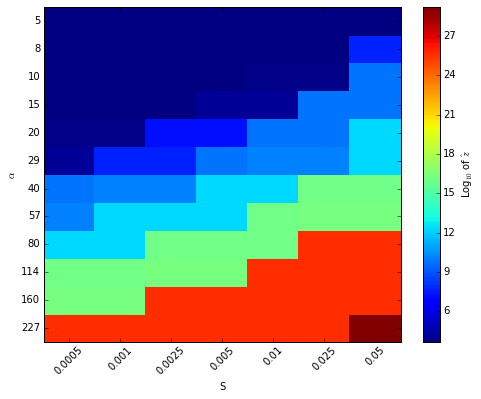

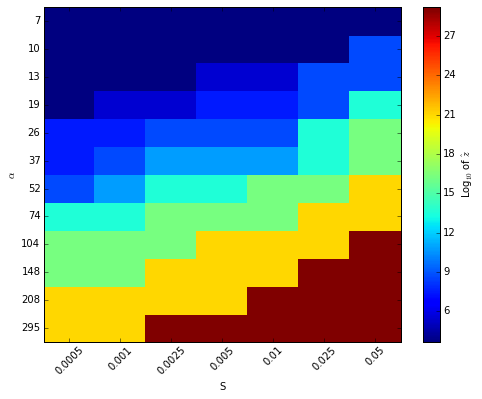

In [7]:
# Figure 2
def plot_(fig):
    n_reps = trillion.N_TESTS if fig=='a' else trillion.N_SUBJECTS
    n_replicates_list = np.ceil(n_reps*2.0**np.arange(3.5,-2.5,-0.5))
    alphas,reps,z_ = trillion.num_odors_vs_alpha_and_replicates(r,fig=fig,n_replicates_list=n_replicates_list)
    z_ = z_.transpose() # Rotate.  
    vmin = np.log10(trillion.disc(N,C,N))
    vmax = np.log10(trillion.disc(N,C,0))
    fig, ax = plt.subplots()
    plt.pcolor(np.log10(z_), vmin=vmin, vmax=vmax)
    plt.xticks(np.arange(0,len(alphas))+0.5)
    ax.set_xticklabels(alphas,rotation=45)
    plt.yticks(np.arange(0,len(reps))+0.5)
    ax.set_yticklabels(reps)
    plt.ylabel(r"$\alpha$")
    plt.xlabel("$%s$" % 'T' if fig=='a' else 'S')
    bar = plt.colorbar()
    bar.set_label("Log$_{10}$ of $\hatz$")

plot_('a')
plot_('b')

### <a id="Table2"></a> Table 2: Selected values from the color map in Figure 2.  

In [8]:
# Table 2
params_list = {'a':[(0.05,T),
                    (0.05,5),
                    (0.05,10),
                    (0.05,185),
                    (0.001,T),
                    (0.01,15)],
               'b':[(0.025,S),
                    (0.025,7),
                    (0.025,135),
                    (0.05,110),
                    (0.001,S),
                    (0.01,15)]}
for fig in ['a','b']:
    print(u'z\talpha\t%s' % ('T' if fig=='a' else 'S')) 
    for alpha_,n_replicates in params_list[fig]:
        z = trillion.num_odors(results,fig=fig,alpha=alpha_,C=C,N=30,n_replicates=n_replicates)
        print('%.3g\t%.2g\t%d' % (z,alpha_,n_replicates))
    print('\r')

z	alpha	T
2.02e+12	0.05	20
4.56e+03	0.05	5
6.08e+09	0.05	10
1.54e+29	0.05	185
8.94e+03	0.001	20
1.79e+04	0.01	15

z	alpha	S
3.81e+13	0.025	26
4.56e+03	0.025	7
1.54e+29	0.025	135
1.54e+29	0.05	110
3.47e+07	0.001	26
2.98e+05	0.01	15



##### <a id="Fig3"></a> Figure 3 (not shown here) is a schematic produced in Illustrator.

### <a id="Fig4"></a> Figure 4: How many discriminable stimuli do we estimate if we vary the size of the molecular library $C$, and consider same performance, best performance, or worst possible performance?  

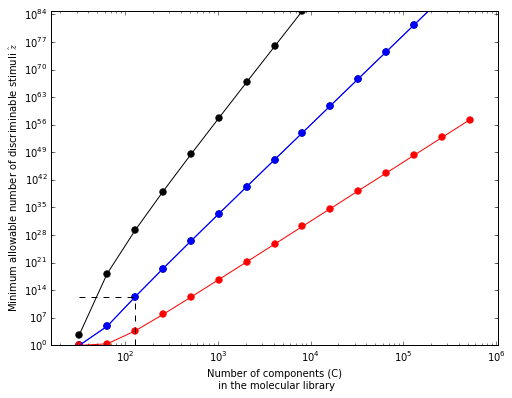

In [9]:
# Compute (using pooling across tests; change 'fig' to 'b' to do pooling across subjects).  
C_list,z_same = trillion.num_odors_vs_C(r,fig='a')
z_worst = [trillion.disc(N,_,N) for _ in C_list]
z_best = [trillion.disc(N,_,0) for _ in C_list] 

def plot_(C_list,z_list,color,label):
    plt.scatter(C_list,z_list,color=color,s=40)
    plt.plot(C_list,z_list,color=color,label=label)
    
plot_(C_list,z_same,'b','same performance')
plot_(C_list,z_worst,'r','worst possible')
plot_(C_list,z_best,'k','best possible')
plt.xscale('log')
plt.yscale('log')
plt.xlim(C_list[0]/2,C_list[-1]*2)
plt.ylim(1,1e85)
plt.xlabel("Number of components (C) \n in the molecular library")
plt.ylabel(r'Minimum allowable number of discriminable stimuli $\hat{z}$')


# Add dashed lines indicating estimate in the original paper.  
z_same_C = z_same[list(C_list).index(128)]
plt.plot([C,C],[1,z_same_C],color='k',linestyle='--')
plt.plot([C_list[0],C],[z_same_C,z_same_C],color='k',linestyle='--')

# Save data.  
def savetxt(kind,x,y):
    np.savetxt('z_vs_C_%s.csv' % kind, np.vstack((x,y)).transpose(), delimiter=",")
savetxt('same',C_list,z_same)
savetxt('worst',C_list,z_worst)
savetxt('best',C_list,z_best)

### <a id="Fig5"></a> Figure 5: Alternative versions of Figure 4c from the original paper, comparing $\gamma$=1 vs $\gamma$=2.  

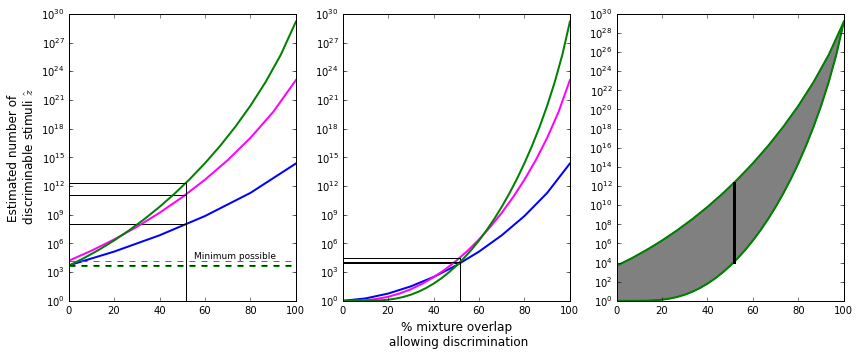

In [10]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,5))
_ = trillion.fig4x(results,'a',alpha=alpha,gamma=2,axes=ax1,xlabel=False)
for color,N_ in [('blue',10),('magenta',20),('green',30)]:
    z_min = trillion.disc(N_,128,N_)
    ax1.plot([0,100],[z_min,z_min],'--',color=color)
ax1.text(55, 3e4, 'Minimum possible', fontsize=9)
_ = trillion.fig4x(results,'a',alpha=alpha,gamma=1,axes=ax2,ylabel=False)
_,z_high = trillion.fig4x(results,'a',alpha=alpha,gamma=2,axes=ax3,Ns=[30],xlabel=False,ylabel=False,lines=False)[0]
_,z_low = trillion.fig4x(results,'a',alpha=alpha,gamma=1,axes=ax3,Ns=[30],xlabel=False,ylabel=False,lines=False)[0]
d = trillion.fig3x(results,fig='a',plot=False)
x = np.linspace(0,100,1000)
y1 = [trillion.disc(30,128,30*(100-xi)/100) for xi in x]
y2 = [trillion.disc_prime(30,128,30*(100-xi)/100) for xi in x]
ax3.fill_between(x, y1, y2, facecolor='gray', interpolate=True)
ax3.plot([d,d],[z_low,z_high],'-',color='k',linewidth=3)
plt.tight_layout()

### <a id="Supplement"></a> Supplemental Information

### <a id="FigS1"></a> Figure S1: Regeneration of <i>trillion</i>'s Fig. 3a and Fig. 4c using their raw data and reconstituted methods (see Fig. <a href="#FigS7">S7</a> for reproduction of their 3b and 4d, and Fig. <a href="#FigS10">S10</a> for reproduction of their 2b and 2c)

Mixture overlap at which 50% of subjects can significantly discriminate is 51.47%


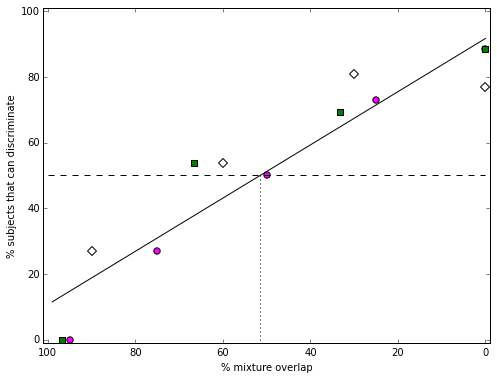

In [11]:
# Figure S1A: Regenerate Fig. 3a from Bushdid et al. using their data and methods.
overlap = trillion.fig3x(results,fig='a',alpha=alpha)
print('Mixture overlap at which 50%% of subjects can significantly discriminate is %.2f%%' % overlap)

Estimated number of discriminable stimuli for N=10 is 1e+08
Estimated number of discriminable stimuli for N=20 is 1.27e+11
Estimated number of discriminable stimuli for N=30 is 2.02e+12


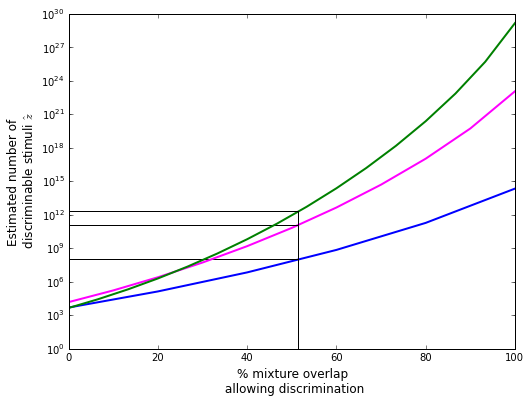

In [12]:
# Figure S1B: Regenerate Fig. 4c from Bushdid et al. using their data and methods.
_ = trillion.fig4x(results,'a',alpha=alpha)
for (N_,z_) in _:
    print('Estimated number of discriminable stimuli for N=%d is %.3g' % (N_,z_))

### <a id="FigS2"></a> Figure S2 shows the relationship between a threshold and a function of the data and that threshold.

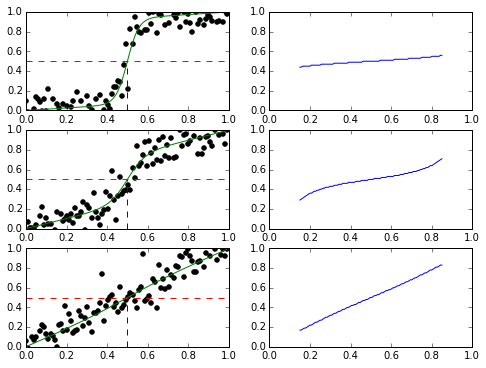

In [13]:
# Figure S2
from scipy.optimize import leastsq
# Used to generate noisy data.  
def sigmoid(x,steepness,linearity,noise):
    sig = 1/(1+np.exp((-1*(x-0.5))*steepness))
    y = linearity*x + ((1-linearity)*sig) + noise*np.random.randn()
    return y

fig,ax = plt.subplots(3,2)
for axis_num,(steepness,linearity) in enumerate([(40,0.2),(20,0.5),(1,1)]):
    # Generate noisy data.    
    noise = 0.1
    left = ax[axis_num,0]
    x = np.linspace(0,1,100)
    y = np.array([sigmoid(xi,steepness,linearity,noise) for xi in x])
    
    # Left panel: scatter plot.  
    left.scatter(x,y,color='k')
    left.plot([0,1],[0.5,0.5],color='r',linestyle='--')
    left.plot([0.5,0.5],[0,0.5],color='b',linestyle='--')
    
    # Left panel: compute and plot fit.  
    thresholds = np.linspace(0.15,0.85,100)
    fitfunc = lambda p, x: sigmoid(x,*p) # Target function
    errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
    p0 = [20,0.5,0.1] # Initial guess for the parameters
    p1, success = leastsq(errfunc, p0[:], args=(x, y)) 
    y_fit = np.array([sigmoid(xi,p1[0],p1[1],0) for xi in x])
    left.plot(x,y_fit,color='g')
    
    # Right panel: compute d for each threshold.   
    d = [sum(y_fit<thresh)/100 for thresh in thresholds]
    
    # Right panel: plot d vs theshold.  
    right = ax[axis_num,1]
    right.plot(thresholds,d)
    for axes in [left,right]:
        axes.set_xlim(0,1)
        axes.set_ylim(0,1)

### <a id="FigS3"></a> Figure S3 shows a result similar to Fig. 3a from Bushdid et al. (and to our Fig. S1a), but using the <i>fraction discriminated</i> instead of the <i>fraction signifiantly discriminable</i>.  

Mixture overlap at which 50% of discriminations were successful is 63.75%


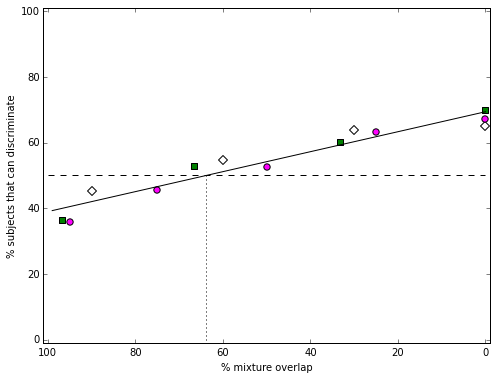

In [14]:
# Hypothetical reproduction of Fig. 3a from Bushdid et al. using their data and methods, but with fraction discriminated 
# rather than fraction significantly discriminated.  An analogous reproduction of Fig. 3b would be identical since without 
# a thresholding step due to hypothesis testing, it doesn't matter whether we average across subjects or tests first.  
overlap = trillion.fig3x(results,alpha=None,threshold=50.0)
print('Mixture overlap at which 50%% of discriminations were successful is %.2f%%' % overlap)

### <a id="FigS4"></a> Figure S4 shows the relationship between the threshold in Figure S3 and the calculation of a discriminability limen $d$ and the estimated number of discriminable olfactory stimuli $z$, using the equations used in the paper.  

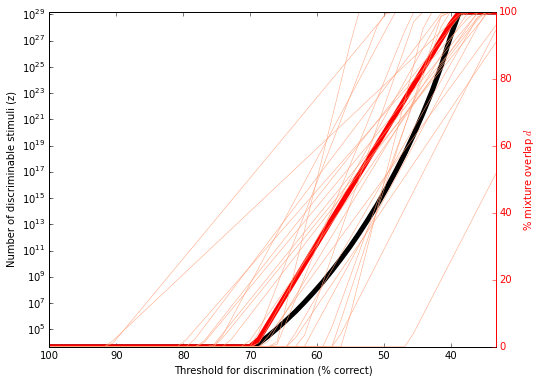

In [15]:
# Figure S4.  Note that this is again avoids a hypothesis testing step, i.e. it computes fraction 
# discriminable directly instead of computing fraction significantly discriminable, in an effort to avoid the
# strong effects of the number of subjects, the number of tests, and the significance threshold $\alpha$ on the result.  
# It is the result of computing Fig. S3 under a number of different thresholds.  

# Set up figure.  
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

thresholds = np.linspace(100,33.3,50)
for subject_num in range(trillion.N_SUBJECTS+1):
    # Compute.  
    results_subject = [result for result in results if subject_num==0 or result.subject_id==subject_num]
    overlaps = [trillion.fig3x(results_subject,alpha=None,threshold=threshold,plot=False) for threshold in thresholds]
    d = [(100-overlap)/100 for overlap in overlaps] # Convert from percent overlap to fraction distinct components.
    z_ = [trillion.disc(N,C,N*d_) for d_ in d]

    # Plot.
    if subject_num:
        #ax1.plot(thresholds,z_,color='lightgrey',linewidth=0.5)
        ax2.plot(thresholds,overlaps,color='lightsalmon',linewidth=0.5)
        data_ = np.vstack((data_,overlaps,z_))
    else:
        ax1.plot(thresholds,z_,color='k',linewidth=5)
        ax2.plot(thresholds,overlaps,color='r',linewidth=5)
        data_ = np.vstack((thresholds,overlaps,z_))
        
# Scale, label, and colorize.  
ax1.set_xlim(100,33.3)
ax1.set_yscale('log')
ax1.set_ylim(trillion.disc(N,C,N),trillion.disc(N,C,0))
ax1.set_xlabel('Threshold for discrimination (% correct)')
ax1.set_ylabel('Number of discriminable stimuli (z)')
ax2.set_ylabel(r'% mixture overlap $d$')
ax2.spines['right'].set_color('red')
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')

np.savetxt('z_and_d_vs_threshold.csv',data_.transpose(),delimiter=',')

### <a id="FigS5"></a> Figure S5: Dependence of z on the number of subjects, the number of tests, $\alpha$, or the decision to correct for multiple comparisons.  

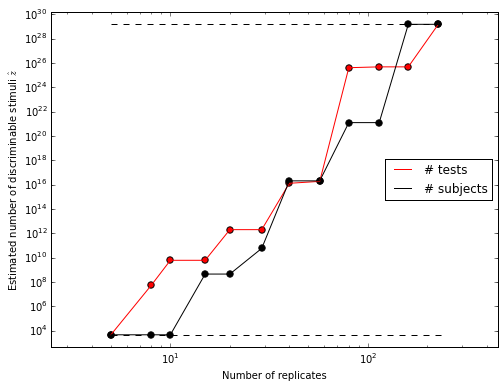

In [16]:
# Figure S5a: z vs. S, Z vs T.  

# Compute and plot.  
(n_tests,z_tests) = trillion.num_odors_vs_replicates(results,fig='a',n_replicates_list=trillion.N_TESTS_LIST)
(n_subjects,z_subjects) = trillion.num_odors_vs_replicates(results,fig='b',n_replicates_list=trillion.N_TESTS_LIST)
plt.xlabel("Number of replicates")
plt.legend(loc=7)

# Add dashed lines indicating the minimum and maximum possible values under the framework.  
z_max = trillion.disc(N,C,0)
z_min = trillion.disc(N,C,N)
plt.plot([5,250],[z_min,z_min],color='k',linestyle='--')
plt.plot([5,250],[z_max,z_max],color='k',linestyle='--')

# Save data.  
def savetxt(fig,x,y):
    np.savetxt('z_vs_%s.csv' % ('tests' if fig=='a' else 'subjects'), np.vstack((x,y)).transpose(), delimiter=",")
savetxt('a',n_tests,z_tests)
savetxt('b',n_subjects,z_subjects)

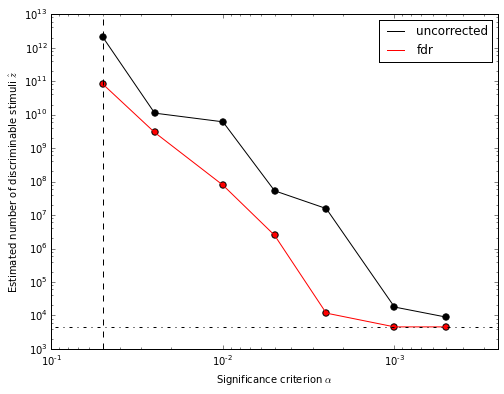

In [17]:
# Figure S5b.  z vs. alpha, corrected and uncorrected.   

# Compute and plot.  
(alphas,z_uncorrected) = trillion.num_odors_vs_alpha(results,fig='a',alphas=trillion.ALPHAS_LIST,multiple_correction=None)
(alphas,z_corrected) = trillion.num_odors_vs_alpha(results,fig='a',alphas=trillion.ALPHAS_LIST,multiple_correction='fdr')
plt.ylim(1e3,1e13)
plt.legend()

# Add dashed lines indicating the minimum possible values under the framework, and alpha=0.05.  
z_min = trillion.disc(N,C,N)
plt.plot([0.5,0.0001],[z_min,z_min],color='k',linestyle='-.')
plt.plot([0.05,0.05],[1e3,1e13],color='k',linestyle='--')

# Save data.  
def savetxt(corrected,x,y):
    np.savetxt('z_vs_alpha_%scorrected.csv' % ('un' if not corrected else ''), np.vstack((x,y)).transpose(), delimiter=",")
savetxt(False,alphas,z_uncorrected)
savetxt(True,alphas,z_corrected)

### <a id="FigS6"></a> Figure S6: The fraction discriminated at which significance is reached.  

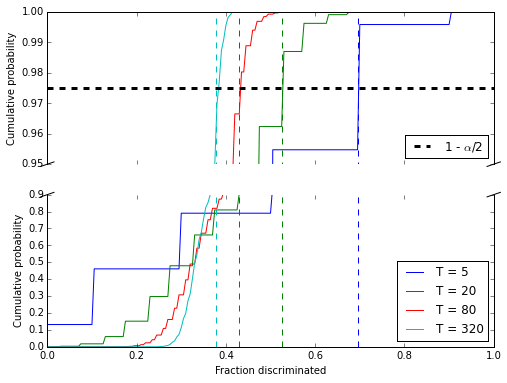

In [18]:
# Figure S6.  
from scipy.optimize import fsolve
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

num_tests = [5,20,80,320] # Consider four differently size studies (the original paper used 20 tests per class.)
for T_ in [5,20,80,320]:
    # The cumulative distribution function for chance (1/3 expected correct) performance
    # for observed fraction discriminated fnd_.  
    def func(fnd_):
        return sum([trillion.get_n_combos(T_,k)*((1/3)**k)*((2/3)**(T_-k)) 
                    for k in range(0,1+np.round(fnd_*T_).astype('int'))])
        
    # Plot.  
    tau = np.linspace(0, 1, 201)
    cdf = [func(_) for _ in tau]
    for i,ax in enumerate([ax1,ax2]):
        ax.plot(tau,cdf,label='T = %d' % T_ if i else None)
    
    # Save data.  
    np.savetxt('T%d.csv' % T_,np.vstack((tau, [func(_) for _ in tau])).transpose(),delimiter=',')

# Break y-axis:  
ax1.set_ylim(0.95,1) # outliers only
ax2.set_ylim(0,0.9) # most of the data
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
diag = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax.plot((-diag,+diag),(-diag,+diag), **kwargs)      # top-left diagonal
ax.plot((1-diag,1+diag),(-diag,+diag), **kwargs)    # top-right diagonal
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-diag,+diag),(1-diag,1+diag), **kwargs)   # bottom-left diagonal
ax2.plot((1-diag,1+diag),(1-diag,1+diag), **kwargs) # bottom-right diagonal
    
# Plot dashed lines to indicate crossing points for alpha=0.05, 
# i.e. for what fraction discriminated significance is acheived.      
ax1.plot([0,1],[1-alpha/2,1-alpha/2],color='k',linewidth=3, linestyle='--', label=r"1 - $\alpha$/2")
for ax in [ax1,ax2]:
    ax.plot([0.378,0.378],[0,1],color='c',linestyle='--')
    ax.plot([0.43,0.43],[0,1],color='r',linestyle='--')
    ax.plot([0.525,0.525],[0,1],color='g',linestyle='--')
    ax.plot([0.695,0.695],[0,1],color='b',linestyle='--')
    ax.set_ylabel("Cumulative probability")
ax2.set_xlabel("Fraction discriminated")
ax1.legend(loc=4)
ax2.legend(loc=4)

##### <a id="FigS7"></a> Fig. S7: regeneration of the <i>trillion</i>'s Fig. 3b using their raw data and reconstituted methods:

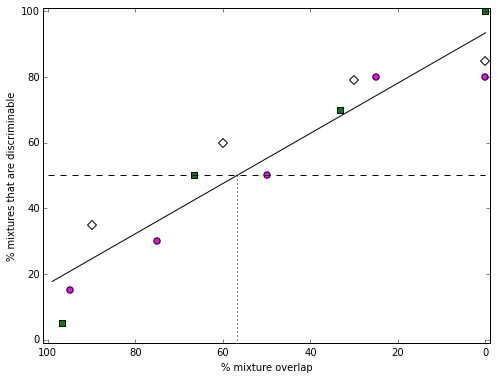

In [19]:
# Fig. S7a: Regenerate Fig. 3b from Bushdid et al. using their data and methods.
overlap = trillion.fig3x(results,fig='b',alpha=0.025)
# Note that a different value of alpha is required to match Fig. 3b than Fig. 3a.  

Estimated number of discriminable stimuli for N=10 is 3.43e+08
Estimated number of discriminable stimuli for N=20 is 1.17e+12
Estimated number of discriminable stimuli for N=30 is 3.81e+13


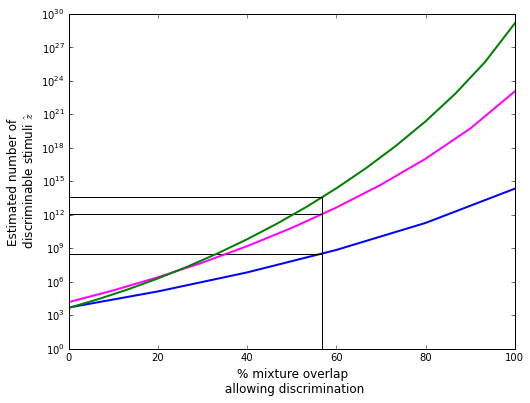

In [20]:
# Figure S7b: Regenerate Fig. 4c from Bushdid et al. using their data and methods.
_ = trillion.fig4x(results,'b',alpha=alpha)
for (N_,z_) in _:
    print('Estimated number of discriminable stimuli for N=%d is %.3g' % (N_,z_))

#### <a id="FigS8"></a> Fig. S8: If we vary $S$ (or $T$) and $C$ simultaneously:

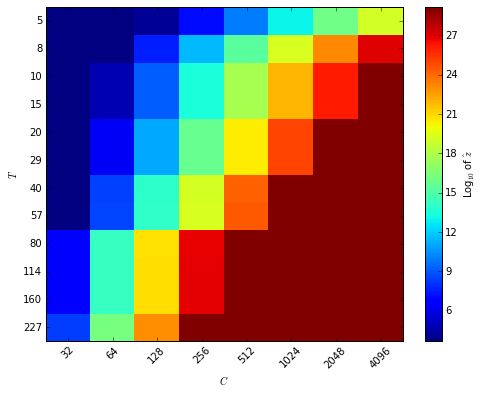

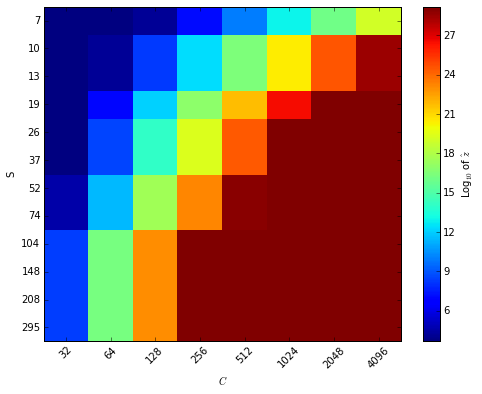

In [21]:
# Note the saturated dark red area represents the maximum possible number of discriminable stimuli, i.e. all stimuli.  
# Similarly, the dark blue area represents the minimum possible number of discriminable stimuli.  
def plot_(fig):
    n_reps = trillion.N_TESTS if fig=='a' else trillion.N_SUBJECTS
    n_replicates_list = np.ceil(n_reps*2.0**np.arange(3.5,-2.5,-0.5))
    reps,Cs,z_ = trillion.num_odors_vs_replicates_and_C(r,fig=fig,n_replicates_list=n_replicates_list,Cs=trillion.C_LIST[:8])
    vmin = np.log10(trillion.disc(N,C,N))
    vmax = np.log10(trillion.disc(N,C,0))
    f, ax = plt.subplots()
    plt.pcolor(np.log10(z_), vmin=vmin, vmax=vmax)
    plt.xticks(np.arange(0,len(Cs))+0.5)
    ax.set_xticklabels(Cs.astype('int'),rotation=45)
    plt.yticks(np.arange(0,len(reps))+0.5)
    ax.set_yticklabels(reps.astype('int'))
    plt.xlabel(r"$C$")
    plt.ylabel("$%s$" % 'T' if fig=='a' else 'S')
    bar = plt.colorbar()
    bar.set_label("Log$_{10}$ of $\hatz$")
    
plot_('a')
plot_('b')

#### <a id="FigS9"></a> Fig. S9: If we vary $\alpha$ and $C$ simultaneously:

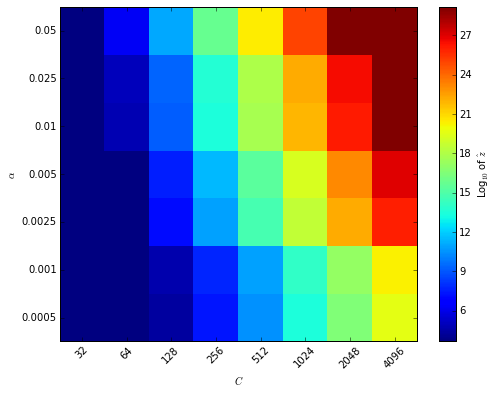

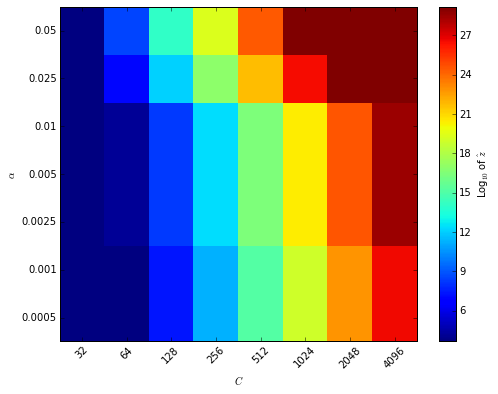

In [22]:
# Note the saturated dark red area represents the maximum possible number of discriminable stimuli, i.e. all stimuli.  
# Similarly, the dark blue area represents the minimum possible number of discriminable stimuli.  
def plot_(fig):
    n_reps = trillion.N_TESTS if fig=='a' else trillion.N_SUBJECTS
    n_replicates_list = np.ceil(n_reps*2.0**np.arange(3.5,-2.5,-0.5))
    alphas,Cs,z_ = trillion.num_odors_vs_alpha_and_C(r,fig=fig,alphas=trillion.ALPHAS_LIST,Cs=trillion.C_LIST[:8])
    vmin = np.log10(trillion.disc(N,C,N))
    vmax = np.log10(trillion.disc(N,C,0))
    f, ax = plt.subplots()
    plt.pcolor(np.log10(z_), vmin=vmin, vmax=vmax)
    plt.xticks(np.arange(0,len(Cs))+0.5)
    ax.set_xticklabels(Cs.astype('int'),rotation=45)
    plt.yticks(np.arange(0,len(alphas))+0.5)
    ax.set_yticklabels(alphas)
    plt.xlabel(r"$C$")
    plt.ylabel(r"$\alpha$")
    bar = plt.colorbar()
    bar.set_label("Log$_{10}$ of $\hatz$")
    
plot_('a') # Pooling across tests as in Fig. 3a from the original paper.  
plot_('b') # Pooling across subjects as in Fig. 3a from the original paper.  

##### <a id="FigS10"></a> Figure S10: Reproduction of the raw data from the original paper, using the supplemental materials.  

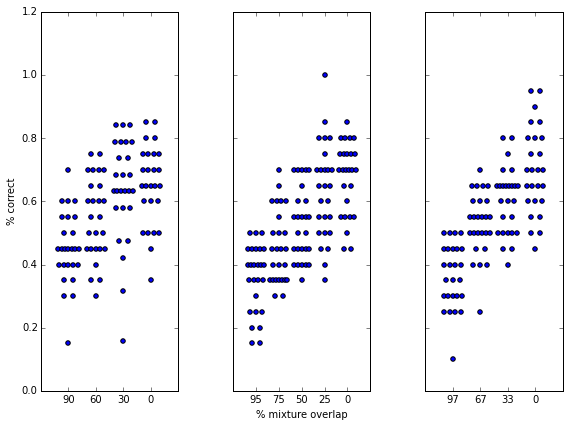

In [39]:
# Figure S10a: Across mixtures (tests).  Reproduction of Fig. 2b from the original paper.  
trillion.fig2x(results,fig='b')

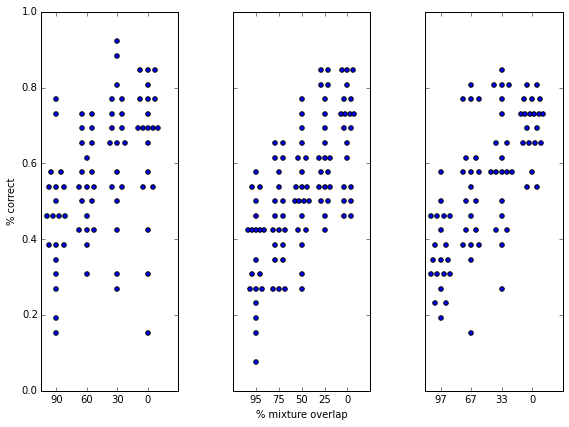

In [40]:
# Figure S10b: Across mixtures (tests).  Reproduction of Fig. 2c from the original paper.  
trillion.fig2x(results,fig='c')

### <a id='gamma'></a> More details on why the estimate provided is an upper bound

The minimum possible number of discrimable stimuli occurs when olfactory resolution is as bad as possible.<br>This occurs when $d$, the discriminability limen, is equal to $N$, the number of components.<br>This means that even when substitute every component, discrimination is still hard or impossible.  

However, using equation 1 from our paper (implemented from the original paper), where the final parameter $d$ is set to $N$:

In [25]:
d = N
print('z = %d' % trillion.disc(N,C,d))

z = 4561


We still get thousands of discriminable stimuli.<br>This can be confirmed by looking at the minimum value in Figure 4C and 4D in the original paper.<br>How is this possible?<br>Shouldn't the worst possible resolution mean that everything smells the same, i.e. anosmia, so that there should be only $z=1$ discriminable stimuli?<br><br>
Maybe $d=N$ means that mixtures are just discriminable when all components are replaced.<br>But there are only $C/N \sim 4$ ways to replace all the components, not $\sim4500$.<br>So maybe it means that $d=N$ is perfectly discriminable, and $d=N-1$ is barely discriminable, and there are $\sim4500$ ways to replace all but 1 component.<br>In that case, we should just be able to plug in N+1 into our formula:  

In [26]:
d = N+1
print('z = %d' % trillion.disc(N,C,d))

z = 2024


This doesn't seem to work; we're still left with $\sim 2000$ discriminable stimuli.<br>
Let's take it up a notch.  

In [27]:
d = N+10
print('z = %d' % trillion.disc(N,C,d))

z = 8


This is already well out of bounds of the way $N$ and $d$ were originally described.<br>We shouldn't be able to make $d$ bigger than $N$, much less 10 components bigger.<br>And yet we still have $>1$ discriminable stimuli.  

In [28]:
d = 2*N
print('z = %d' % trillion.disc(N,C,d))

z = 1


OK, now we finally get to 1 discriminable stimulus, i.e. anosmia, when we set $d$ to twice $N$.<br>
This strongly suggests that there is a mistake in the equation by which the original paper produced the estimate $z$.<br> 
In fact, it suggests that the mistake is an anomalous factor of 2 in one of the equations.<br><br>  

Equation 2 (also implemented from the original paper), is used to compute the denominator in equation 1.<br>It is supposed to give the size of the ball within which pairs of stimuli cannot be discriminated.<br>
Let's see what this equation produces:  

In [29]:
D = N
print('# of stimuli inside the ball = %.3g' % trillion.ball(N,C,D))

# of stimuli inside the ball = 1.54e+29


If the ball has a large enough 'radius', i.e. if olfactory resoution<br>is bad enough, then it should encompass every possible stimulus.  

In [30]:
print('# of possible stimuli = %.3g' % trillion.get_n_combos(C,N))

# of possible stimuli = 1.54e+29


Good, this means that the ball with radius N, the one that allows<br>total replacement of stimuli, covers all possible stimuli.<br><br>
But is this ball that gets used when we calculate the number of discriminable stimuli for worst possible olfactory acuity?<br>
In order to get common sense outcomes, the denominator of equation 1 (the number of stimuli in the ball)<br>should match the numerator of equation 1 (the total number of stimuli) when olfactory acuity is<br>as bad as possible, resulting in a number of discriminable stimuli of $1/1=1$

But instead we get:  

In [31]:
d = N
print('z = %d' % trillion.disc(N,C,d))

z = 4561


which is not 1.  

This is because the denominator of equation 1 doesn't use:
<br>ball(N,C,d)<br>
instead it uses<br>ball(N,C,d/2)

Let's confirm: 

In [32]:
print('# of possible stimuli = %.3g' % trillion.get_n_combos(C,N))
D = N
print('# of stimuli inside the ball with half the radius = %.3g' % trillion.ball(N,C,int(D/2)))
print('The ratio is %d' % (trillion.get_n_combos(C,N)/trillion.ball(N,C,int(D/2))))

# of possible stimuli = 1.54e+29
# of stimuli inside the ball with half the radius = 3.38e+25
The ratio is 4561


So now see the source of the problem.<br>
By introducing an anomalous factor of 2 into the formula,<br>
we generate numbers that do not make sense for worst case performance,<br>
and seem likely to not make sense for any level of performance.  

We'll call this factor $\gamma$, such that the original paper (and this one) use $\gamma=2$,<br>
which we would like to then compare to a $\gamma=1$ scenario.  

See <a href="#Fig5">Fig. 5</a> for this result.  

We notice three things when we change $\gamma$ from 2 to 1:<br><br>
1) The minimum number of discriminable stimuli is now 1, which makes sense.<br>  
2) The maximum number of discriminable stimuli is unchanged, and is equal to the total number of stimuli, which also makes sense.<br><br>
and most importantly...<br><br>
3) The number of discriminable stimuli estimated from the data is now<br>several orders of magnitude lower, and in the folk wisdom range.<br><br>And this argument (that gamma was chosen incorrectly) is completely independent of and can be combined with, the arguments from the rest of our paper.  

The authors originally argued that the sphere-packing framework provided a <i>lower bound</i> for the number of discriminable stimuli.<br>
Next, we'll show that in the event that we ignore statistical issues and take the reported $d$ as a true measure of human olfactory resolution,<br>
the sphere-packing framework as originally shown by the authors actually gives an <i>upper bound</i>.<br>
In fact, we will show that $\gamma=1$ and $\gamma=2$, respectively, are the lower and upper bounds of this computational problem.

Before continuing, we'd also like to note that all of this is predicated on the stimulus dimensions being independent, which they certainly are not.<br>That further constratins the usefulness of this approach, but the math that follows is nonetheless interesting. 

The general problem of determing how many ways you can substitute $d$ components from a set of $N$, with a total of $C$ to choose from, is known in coding theory as the problem of "constant weight codes".<br>
In this literature, the "largest" constant weight code for values of $N$, $D$, and $C$ (which annoyingly have different letters in the math literature) is the one with the most "words".  This is equivalent to the largest olfactory mixture set -- the one with the largest number of mutually discriminable mixtures.  This is the one we want to solve the problem of how many mutually discriminable mixtures there are (given $N$, $C$, and a data-determined $d$).<br>We will call $z$ the size of the largest such code, because it is the same $z$ that we have been trying to compute all along<br>

There has been a great deal of research on determing $z$.<br>
Once any of these numbers gets especially large, especially C, 
it is essentially impossible to directly compute $z$.<br>
There a few theorems that propose lower and upper bounds for $z$ (more on this later),<br>
but in some cases people have enumerated all the codes (for a given $N$, $C$, and $d$), and then $z$ is just the largest of these.<br>

On the web (http://www.win.tue.nl/~aeb/codes/Andw.html) there is a page that gives the size $z$ of these codes for smallish values of $N$, $C$, and $d$.<br>
So we can directly compare these known, proven values, against our sphere-packing estimates using $\gamma=1$ and $\gamma=2$. Note on that page that $N$ is called $w$, $C$ is called $n$, and $d$ corresponds to floor(($d$-1)/2).<br>
For example:

In [33]:
import numpy as np
def cwc(x_cwc,y_cwc,N,d): # Note that d = floor((d-1)/2).  
    plt.plot(x_cwc,y_cwc,linewidth=4,label='Exact values')
    y_disc = np.array([trillion.disc(N,_,d) for _ in x_cwc])
    y_disc_prime = np.array([trillion.disc_prime(N,_,d) for _ in x_cwc])
    plt.plot(x_cwc,y_disc,label='$\gamma=2$',linestyle='--')
    plt.plot(x_cwc,y_disc_prime,label='$\gamma=1$',linestyle='--')
    plt.plot(x_cwc,[trillion.disc_prime(N,_,d*np.sqrt(2)/2) for _ in x_cwc],label='$\gamma=\sqrt{2}$')
    plt.plot(x_cwc,[trillion.disc_prime(N,_,d*0.75) for _ in x_cwc],label='$\gamma=4/3$')
    plt.yscale('log')
    plt.xlabel('C')
    plt.ylabel('z')
    plt.legend(loc=2)
    plt.title('N = %d, d = %d' % (N,d))

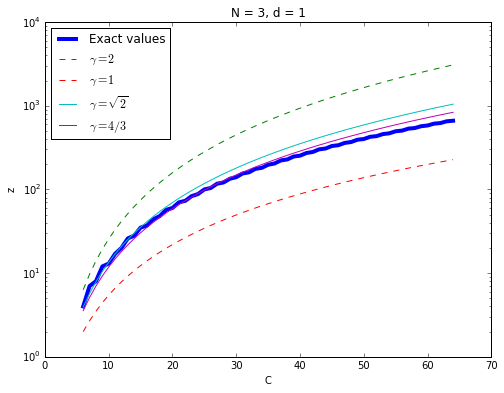

In [34]:
C_list = np.arange(6,65)
z_list =  [4,7,8,12,13,17,20,26,28,35]
z_list += [37,44,48,57,60,70,73,83,88,100]
z_list += [104,117,121,134,140,155,160,176,181,197]
z_list += [204,222,228,247,253,272,280,301,308,330]
z_list += [337,359,368,392,400,425,433,458,468,495]
z_list += [504,532,541,569,580,610,620,651,661]

cwc(C_list,z_list,3,1)

The above shows exact values of $z$ from the literature in blue, with predicted values from equation 1 using various values of $\gamma$ in other colors.<br>
Here and further on, values of $\gamma$ near $\frac{4}{3}$ or $\sqrt{2}$ are reasonably good fits, but as far as we know there is no systematic best fit.<br>
However, here and in all other cases we could find, $\gamma=1$ is lower than all published values (i.e. a lower bound) and \$gamma=2 is higher than all published values (i.e. a higher bound).<br>
This further confirms that the equation (using $\gamma=1$) in the original paper (and our own) is too generous: it is certainly not a lower bound.  

Here are the results for a few other values of $N$:

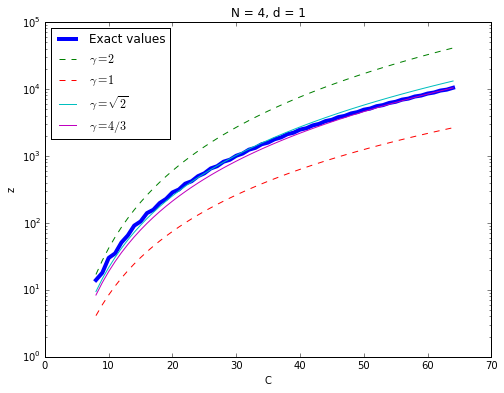

In [35]:
y_cwc =  [14,18,30,35,51,65,91,105,140,157]
y_cwc += [198,228,285,315,385,419,498,550,650,702]
y_cwc += [819,877,1005,1085,1240,1320,1496,1583,1773,1887]
y_cwc += [2109,2223,2470,2593,2856,3010,3311,3465,3795,3959]
y_cwc += [4308,4508,4900,5100,5525,5737,6183,6435,6930,7182]
y_cwc += [7714,7979,8535,8845,9455,9765,10416]
x_cwc = np.arange(8,65)

cwc(x_cwc,y_cwc,4,1)

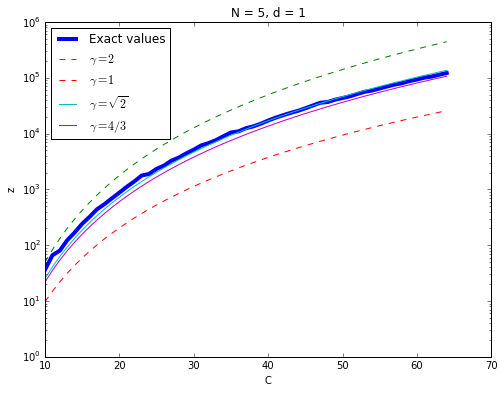

In [36]:
y_cwc =  [36,66,80,123,169,242,322,441,544,692]
y_cwc += [874,1113,1386,1771,1895,2334,2670,3276,3718,4423]
y_cwc += [5148,6138,6758,7656,8976,10472,10948,12473,13471,15010]
y_cwc += [17119,19258,21320,23478,25564,28413,31878,35673,36809,40560]
y_cwc += [43372,46612,51420,56251,59293,64449,69931,75550,79866,87261]
y_cwc += [93206,100527,105472,113553,121902]
x_cwc = np.arange(10,65)

cwc(x_cwc,y_cwc,5,1)

Now what about for other values of $d$?<br>
The exact values are harder to come by.  In many cases, however, there are proofs of very narrow upper and lower bounds,
<br>which for convenience I have averaged together to approximate exact values.<br>
Note that the reported lower and upper bounds are well within the crude $\gamma=1$ and $\gamma=2$ bounds shown here.  

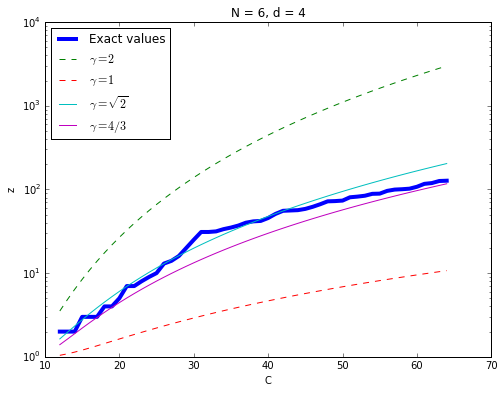

In [37]:
y_cwc =  [2,2,2,3,3,3,4,4,5,7]
y_cwc += [7,8,9,10,13,14,16,20,25,31]
y_cwc += [31,31.5,33.5,35,37,40,41.5,42,45.5,51]
y_cwc += [55.5,56,56.5,58.5,62,66.5,72,72.5,73.5,80.5]
y_cwc += [82,84,88.5,89,96,99.5,100.5,102,107.5,116.5]
y_cwc += [119,126,127]
x_cwc = np.arange(12,65)

cwc(x_cwc,y_cwc,6,4)

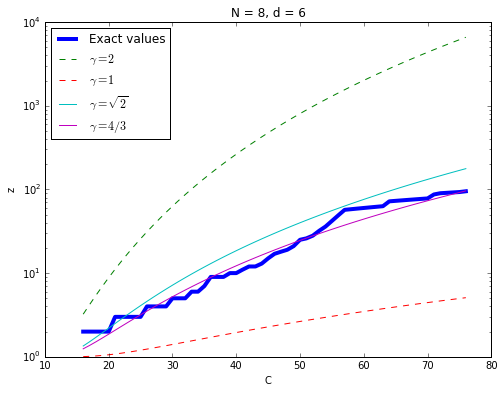

In [38]:
y_cwc =  [2,2,2,2,2,3,3,3,3,3]
y_cwc += [4,4,4,4,5,5,5,6,6,7]
y_cwc += [9,9,9,10,10,11,12,12,13,15]
y_cwc += [17,18,19,21,25,26,28,32,36,42]
y_cwc += [49,57,58,59,60,61,62,63,72,73]
y_cwc += [74,75,76,77,78,87,90,91,92,93]
y_cwc += [95]
x_cwc = np.arange(16,77)

cwc(x_cwc,y_cwc,8,6)

In no case that we could find are the exact values (or any reported bounds) either less than predicted by equation 1 with $\gamma=1$ or greater than predicted with $\gamma=2$.  At best they are equal, for example in the case of D=N, when both the exact value and that predicted using $\gamma$=1 are equal to 1.  

Do these bounds (the sphere-packing equation 1 with $\gamma=1$ or $\gamma=2$) have any mathematical justification,<br>
or are they just conveniently small and large numbers, respectively?<br>
In fact, there are two well-known bounds from coding theory (that can be found in any textbook on the subject) that look almost exactly like equation 1, one with $\gamma=1$ and one with $\gamma=2$.

The first of these is called the Hamming bound (http://en.wikipedia.org/wiki/Hamming_bound).<br>
The Hamming bound is well known to be an upper bound.<br>
The second is only slightly more obscure and is called the Gilbert-Varshamov (or GSV) bound (http://en.wikipedia.org/wiki/Gilbert%E2%80%93Varshamov_bound).<br>
It is just like the Hamming Bound, except with a difference of factor of 2 in upper limit of the summations.

And a factor of 2 in the upper limit of the summation is exactly what distinguishes $\gamma=2$ from $\gamma=1$ in equation 1!<br>
However, the form of the Hamming and GSV bounds isn't <i>quite</i> the same as that of equation 1.<br>
This is because those bounds are for codes of arbitrary weight, i.e. where N is allowed to vary.<br>
In that scenario, the size of the space is not ${C \choose N}$ but simply $2^{C}$, accounting for the discrepancy in the numerator.<br>
With this small change, equation 1 with $\gamma=1$ matches the GSV bound precisely,<br>
and equation 1 with $\gamma=2$ matches the Hamming bounds precisely.

Further support for the corresponding modifications to the such bounds can be found in:<br>
V.I. LEVENSHTEIN,Upper bound estimates for fixed-weight codes, Probl. Inform. Transmission, 7, (1971), 281–287.<br>
as discussed in:<br>
"Asymptotic Improvement of the Gilbert-Varshamov Bound on the Size of Binary Codes", JIANG T and VARDY A (eq. 44)<br>
Further support for the corresponding modifications to the GSV bounds can be found in:<br>
V.I. LEVENSHTEIN,Upper bound estimates for fixed-weight codes, Probl. Inform. Transmission, 7, (1971), 281–287.<br>
as discussed in:<br>
"Asymptotic Improvement of the Gilbert-Varshamov Bound on the Size of Binary Codes", JIANG T and VARDY A (eq. 44)

The most likely explanation for this mistake is that, in the literature on codes, the Hamming distance represents the number of "bit flips", i.e. the number of changes from 0 to 1 or 1 to 0 across the digits of a word.<br>
This means that a difference of D=1, i.e. the substituion of one mixture component for another, represents a Hamming distance of 2, correspond to one addition (0 to 1) plus one deletion (1 to 0).<br>
In the literature discussing these bounds, the upper limit on the summation in the denominator is often expressed as the Hamming distance divided by 2, especially for constant weight codes where the Hamming distance is necessarily an even number.

We believe that the authors of the original paper took this division by 2 to apply to D itself, when in fact D *already represents* division of the Hamming distance by 2, so an *extra* division by 2 changes the equation completely.<br>
In fact, that extra division by 2 turned an equation for lower bound (that they thought they were using) into an equation of an upper bound (which they were actually using).

In conclusion, the constant-weight version of the Hamming bound is exactly what was used in the original paper -- however there it was falsely advertised as a lower bound.<br>That is obviously a very big difference, especially since these are very conservative bounds.<br>I can conservatively say that $10^{15}$ is an upper bound on the number of humans on Earth, and not to br wrong.  But if I call that a lower bound, then I would be terribly mistaken.<br><br>